In [509]:
import pandas as pd
import numpy as np

In [510]:
pd.set_option('display.max_columns', None)

In [511]:
df_orig = pd.read_csv('!01_02-18_VSE.csv', encoding='cp1251', sep=';', low_memory=False)
df_orig

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,ПричинаОтмены,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДатыЗаказа,ГодДатыЗаказа,ПВЗ_код,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
0,01.02.2018 10:38,10.02.2018 0:00,7291373_TR,Возврат из ПВЗ,7 014,7 014,Магазины,Безналичная,Коломна (Московская область район),NaN,NaN,NaN,ИНОЕ,Доставка,NaN,Нет,NaN,1,49,49,NaN,2,2 018,GL0285876,Возврат,МО,NaN,49,49,1,1,01.02.2018 0:00,55575653-55555051535479,guest_103117_gu28@workmail.ru,Гость,ID10022107250,0,NaN
1,01.02.2018 12:32,03.02.2018 0:00,7292459_TR,Доставлен,906,906,Магазины,Безналичная,Москва,NaN,NaN,NaN,ИНОЕ,Доставка,NaN,Нет,NaN,1,49,49,NaN,2,2 018,GL0285876,Доставлен,Москва,NaN,49,49,1,1,01.02.2018 0:00,55574954-53575755575772,guest_103117_gu28@workmail.ru,Гость,ID10022107250,0,NaN
2,07.02.2018 16:16,09.02.2018 0:00,7356567_TR,Возврат из ПВЗ,858,858,Магазины,Безналичная,Люберцы (Люберецкий район),ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,куклы/пупсы,ИГРУШКИ,"BARBIE, КУКЛЫ Сияние моды, (в асс)",МГТ,Нет,NaN,1,809,809,704,2,2 018,GL0285876,Возврат,МО,105,49,49,1,0,07.02.2018 0:00,55575054-55535354545172,108117_lu21@yandex.ru,Елена,ID000sn-9504351,0,NaN
3,02.02.2018 20:27,15.02.2018 0:00,7305890_TR,Доставлен,3 598,3 598,Магазины,Безналичная,Волгоград,NaN,NaN,NaN,ИНОЕ,Доставка,NaN,Нет,NaN,1,99,99,NaN,2,2 018,23111,Доставлен,Регионы,NaN,99,99,1,1,02.02.2018 0:00,55574852-52515654505079,101109_em20@gmail.com,Гость,ID10022107250,0,NaN
4,06.02.2018 12:34,12.02.2018 0:00,7341741_TR,К отгрузке,6 148,6 148,Курьерская,Наличная,Мытищи (Мытищинский район),ИГРУШКИ,НАСТОЛЬНЫЕ ИГРЫ,прочие настольные игры,ИГРУШКИ,ИГРА Умные игры. Чей малыш?,МГТ,Нет,NaN,1,128,128,"96,45",2,2 018,NaN,Доставлен,МО,"31,55",150,150,12,1,06.02.2018 0:00,55574954-55495350495278,108117_lu16@mail.ru,Людмила,ID9010000097654,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693705,24.01.2018 16:10,26.01.2018 0:00,7197353_TR,Доставлен,4 029,3 125,Магазины,Безналичная,Химки (Московская область район),ИГРУШКИ,МУЗЫКАЛЬНЫЕ ИНСТРУМЕНТЫ,набор музыкальных инструментов,ИГРУШКИ,"S+S TOYS, ИНСТРУМЕНТЫ муз.",МГТ,Нет,NaN,1,214,214,134,1,2 018,GL0285876,Доставлен,МО,80,0,0,1,1,24.01.2018 0:00,55574957-49485057515771,105117_iu24@mail.ru,Ирина,IDL00002922149,0,NaN
693706,23.01.2018 17:42,31.01.2018 0:00,7189958_TR,Принят в ПВЗ,1 645,1 645,Магазины,Безналичная,Челябинск,ИГРУШКИ,МУЗЫКАЛЬНЫЕ ИНСТРУМЕНТЫ,набор музыкальных инструментов,ИГРУШКИ,"S+S TOYS, ИНСТРУМЕНТЫ муз.",МГТ,Нет,NaN,1,214,214,134,1,2 018,23111,В процессе,Регионы,80,99,99,17,1,23.01.2018 0:00,55574856-53565257495272,108117_lu17@mail.ru,Любовь,IDL00002922149,0,NaN
693707,23.01.2018 23:56,26.01.2018 0:00,7196790_TR,К отгрузке,2 095,2 095,Pick point,Безналичная,Домодедово (Домодедовский район),ИГРУШКИ,МУЗЫКАЛЬНЫЕ ИНСТРУМЕНТЫ,набор музыкальных инструментов,ИГРУШКИ,"S+S TOYS, ИНСТРУМЕНТЫ муз.",МГТ,Нет,NaN,1,214,214,134,1,2 018,NaN,Доставлен,МО,80,300,300,4,1,23.01.2018 0:00,55574851-53575255565677,guest_103117_gu28@workmail.ru,Гость,IDL00002922149,0,NaN
693708,23.01.2018 22:56,31.01.2018 0:00,7195888_TR,Доставлен,1 519,1 519,Магазины,Безналичная,Липецк,ИГРУШКИ,МУЗЫКАЛЬНЫЕ ИНСТРУМЕНТЫ,набор музыкальных инструментов,ИГРУШКИ,"S+S TOYS, ИНСТРУМЕНТЫ муз.",МГТ,Нет,NaN,1,214,214,134,1,2 018,GL0316564,Доставлен,Регионы,80,99,99,2,1,23.01.2018 0:00,55574852-50574855555171,118117_vu15@mail.ru,Анна,IDL00002922149,0,NaN


In [512]:
# Пофиксила тип числовых значений
numeric_columns = [
    'СуммаЗаказаНаСайте', 
    'СуммаДокумента', 
    'Цена', 
    'СуммаСтроки', 
    'ЦенаЗакупки', 
    'Маржа', 
    'СуммаУслуг', 
    'СуммаДоставки']    
    
for col in numeric_columns:
    df_orig[col] = (df_orig[col]
                    .astype(str)
                    .str.replace('\xa0', '', regex=False)  # на всякий случай
                    .str.replace(' ', '', regex=False)
                    .str.replace(',', '.', regex=False))
    df_orig[col] = pd.to_numeric(df_orig[col], errors='coerce')
    
# тип даты
df_orig["Дата"] = pd.to_datetime(df_orig["Дата"], dayfirst=True, errors="coerce")
df_orig["ДатаДоставки"] = pd.to_datetime(df_orig["ДатаДоставки"], dayfirst=True, errors="coerce")
df_orig["ДатаЗаказаНаСайте"] = pd.to_datetime(df_orig["ДатаЗаказаНаСайте"], dayfirst=True, errors="coerce")

df_orig['МетодДоставки'] = (
    df_orig['МетодДоставки']
    .astype(str)         
    .str.strip()         
    .str.lower()
)

df_orig['ФормаОплаты'] = (
    df_orig['ФормаОплаты']
    .astype(str)
    .str.strip()
    .str.lower()
)


In [513]:
# df_old=df_orig.copy()

In [514]:
# df=df_old.copy()

In [515]:
df_orig.shape

(693710, 38)

In [516]:
df_orig.columns

Index(['Дата', 'ДатаДоставки', 'НомерЗаказаНаСайте', 'НовыйСтатус',
       'СуммаЗаказаНаСайте', 'СуммаДокумента', 'МетодДоставки', 'ФормаОплаты',
       'Регион', 'Группа2', 'Группа3', 'Группа4', 'Тип', 'Номенклатура',
       'ТипТовара', 'Отменено', 'ПричинаОтмены', 'Количество', 'Цена',
       'СуммаСтроки', 'ЦенаЗакупки', 'МесяцДатыЗаказа', 'ГодДатыЗаказа',
       'ПВЗ_код', 'Статус', 'Гео', 'Маржа', 'СуммаУслуг', 'СуммаДоставки',
       'НомерСтроки', 'КоличествоПроданоКлиенту', 'ДатаЗаказаНаСайте',
       'Телефон_new', 'ЭлектроннаяПочта_new', 'Клиент', 'ID_SKU',
       'ГородМагазина', 'МагазинЗаказа'],
      dtype='object')

In [517]:
df_orig[['Дата', 'ДатаДоставки', 'ДатаЗаказаНаСайте']]

,Дата,ДатаДоставки,ДатаЗаказаНаСайте
0,2018-02-01 10:38:00,2018-02-10,2018-02-01
1,2018-02-01 12:32:00,2018-02-03,2018-02-01
2,2018-02-07 16:16:00,2018-02-09,2018-02-07
3,2018-02-02 20:27:00,2018-02-15,2018-02-02
4,2018-02-06 12:34:00,2018-02-12,2018-02-06
...,...,...,...
693705,2018-01-24 16:10:00,2018-01-26,2018-01-24
693706,2018-01-23 17:42:00,2018-01-31,2018-01-23
693707,2018-01-23 23:56:00,2018-01-26,2018-01-23
693708,2018-01-23 22:56:00,2018-01-31,2018-01-23


	8.	Аномалии дат (доставка раньше заказа).
Ты посчитала количество таких случаев (ДатаДоставки <= ДатаЗаказаНаСайте), но не отработала их. Хорошо бы:
	•	либо пометить флагом date_inconsistent = 1,
	•	либо отфильтровать/исправить (например, если смещение ≤ 1 день и похоже на путаницу полей).

In [518]:
filt = df_orig['ДатаДоставки'] <= df_orig['ДатаЗаказаНаСайте']
df_orig[filt].shape[0]

159

# Чищу датасет

In [519]:
df=df_orig.copy()

In [520]:
# удалила все строки с "Доставка" в столбце "Номенклатура" и "Группа2
df = df[(df['Номенклатура'] != 'Доставка') & (df['Группа2'] != 'Доставка')].copy()

In [521]:
# удалила неизвестных клиентов
df = df[(df['Телефон_new'] != '0')]
df.shape

(571345, 38)

In [522]:
new_order = [
    # Клиент
    "Телефон_new",
    
    # Даты / статусы
    "НомерЗаказаНаСайте",
    "Дата",
    "МесяцДатыЗаказа",
    "ГодДатыЗаказа",
    "НовыйСтатус",
    "Статус",

    # Логистика / оплата / регион
    "МетодДоставки",
    "ФормаОплаты",
    "Регион",
    "ГородМагазина",

    # Категории товаров
    "Группа2",
    "Группа3",
    "Тип",
    "Номенклатура",

    # Продажи и количество
    "Отменено",
    "Количество",
    "КоличествоПроданоКлиенту",
    "ПричинаОтмены",

    # Финансы
    "Цена",
    "ЦенаЗакупки",
    "СуммаСтроки",
    "СуммаЗаказаНаСайте",
    "Маржа",
    "СуммаУслуг",
    "СуммаДоставки",
    
]

df = df[new_order]
df.head(1)

,Телефон_new,НомерЗаказаНаСайте,Дата,МесяцДатыЗаказа,ГодДатыЗаказа,НовыйСтатус,Статус,МетодДоставки,ФормаОплаты,Регион,ГородМагазина,Группа2,Группа3,Тип,Номенклатура,Отменено,Количество,КоличествоПроданоКлиенту,ПричинаОтмены,Цена,ЦенаЗакупки,СуммаСтроки,СуммаЗаказаНаСайте,Маржа,СуммаУслуг,СуммаДоставки
2,55575054-55535354545172,7356567_TR,2018-02-07 16:16:00,2,2 018,Возврат из ПВЗ,Возврат,магазины,безналичная,Люберцы (Люберецкий район),0,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,ИГРУШКИ,"BARBIE, КУКЛЫ Сияние моды, (в асс)",Нет,1,0,NaN,809.0,704.0,809.0,858.0,105.0,49,49


# Заполнение пропусков

In [523]:
df.shape

(571345, 26)

In [524]:
df.isnull().sum()

Телефон_new                      0
НомерЗаказаНаСайте               0
Дата                             0
МесяцДатыЗаказа                  0
ГодДатыЗаказа                    0
НовыйСтатус                      0
Статус                           0
МетодДоставки                    0
ФормаОплаты                      0
Регион                        4484
ГородМагазина                    0
Группа2                          0
Группа3                          0
Тип                              0
Номенклатура                     0
Отменено                         0
Количество                       0
КоличествоПроданоКлиенту         0
ПричинаОтмены               516372
Цена                             0
ЦенаЗакупки                  28066
СуммаСтроки                      0
СуммаЗаказаНаСайте               0
Маржа                        28066
СуммаУслуг                       0
СуммаДоставки                    0
dtype: int64

In [525]:
df['Регион'].unique()

array(['Люберцы (Люберецкий район)', 'Мытищи (Мытищинский район)',
       'Москва', 'Реутов (Московская область район)',
       'Сергиев Посад (Сергиево-Посадский район)', 'Самара', 'Волгоград',
       'Брянск', 'Калуга', 'Красногорск (Красногорский район)',
       'Балашиха (Балашихинский район)', 'Санкт-Петербург', 'Саратов',
       'Казань', 'Рязань', 'Пенза', 'Новосибирск', 'Ставрополь',
       'Тольятти', 'Жуковский (Московская область район)',
       'Щелково (Щелковский район)', 'Кемерово', 'Воронеж', 'Тула',
       'Ростов-на-Дону', 'Подольск (Московская область район)',
       'Раменское (Раменский район)', 'Тюмень', 'Нижний Новгород',
       'Королев (Московская область район)', 'Сургут',
       'Томилино (Люберецкий район)',
       'Павловский Посад (Павлово-Посадский район)', 'Челябинск',
       'Краснодар', 'Ногинск (Ногинский район)', 'Таганрог', 'Красноярск',
       'Пермь', 'Видное (Ленинский район)', 'Екатеринбург',
       'Железнодорожный (Московская область район)', 

In [526]:
df['ГородМагазина'].value_counts()

ГородМагазина
0                 566858
Москва               792
Калуга               268
Ростов-на-Дону       251
Старый               230
                   ...  
Ногинск               11
Мытищи                 7
Таганрог               3
Краснокаменск          2
Волжский               1
Name: count, Length: 70, dtype: int64

In [527]:
# удалила ненужные скобки в регионе: "Люберцы (Люберецкий район)" => "Люберцы"
df['Регион_чистый'] = df['Регион'].str.replace(r"\s*\(.*?\)", "", regex=True).str.strip()

In [528]:
df['Регион_чистый'].unique()

array(['Люберцы', 'Мытищи', 'Москва', 'Реутов', 'Сергиев Посад', 'Самара',
       'Волгоград', 'Брянск', 'Калуга', 'Красногорск', 'Балашиха',
       'Санкт-Петербург', 'Саратов', 'Казань', 'Рязань', 'Пенза',
       'Новосибирск', 'Ставрополь', 'Тольятти', 'Жуковский', 'Щелково',
       'Кемерово', 'Воронеж', 'Тула', 'Ростов-на-Дону', 'Подольск',
       'Раменское', 'Тюмень', 'Нижний Новгород', 'Королев', 'Сургут',
       'Томилино', 'Павловский Посад', 'Челябинск', 'Краснодар',
       'Ногинск', 'Таганрог', 'Красноярск', 'Пермь', 'Видное',
       'Екатеринбург', 'Железнодорожный', 'Нижневартовск', 'Котельники',
       'Петрозаводск', 'Архангельск', 'Томск', 'Сочи', 'Уфа', 'Тобольск',
       'Дубна', 'Оренбург', 'Внуково', 'Иркутск', 'Магнитогорск',
       'Щербинка', 'Орёл', 'Барнаул', 'Ижевск', 'Улан-Удэ',
       'Электросталь', 'Омск', nan, 'Химки', 'Смоленск', 'Тамбов',
       'Набережные Челны', 'Коломна', 'Ульяновск', 'Колпино', 'Ярославль',
       'Климовск', 'Новомосковск', 'Оре

In [529]:
# NaN в Регион_чистый заменила на ГородМагазина
mask = df['Регион_чистый'].isna() & (df['ГородМагазина'] != '0')
df.loc[mask, 'Регион_чистый'] = df.loc[mask, 'ГородМагазина']
df.drop(columns={'Регион'}, inplace=True)

In [530]:
df = df.rename(columns={'Регион_чистый': 'Город'})

In [531]:
df_regions = pd.read_excel("для_сас_города+_население+мелкие_города.xlsx", sheet_name="население 2014")
df_regions

,Регион,Субъект,Город,Население 2014,Население в городе 2013
0,CENTRAL,Белгородская область,Алексеевка,38626,38979
1,CENTRAL,Белгородская область,Белгород,384425,373528
2,CENTRAL,Белгородская область,Валуйки,34296,34627
3,CENTRAL,Белгородская область,Губкин,87405,87556
4,CENTRAL,Белгородская область,Старый Оскол,221254,220816
...,...,...,...,...,...
652,URAL,Ямало-Ненецкий автономный округ,Надым,45766,48500
653,URAL,Ямало-Ненецкий автономный округ,Новый Уренгой,115092,116450
654,URAL,Ямало-Ненецкий автономный округ,Ноябрьск,107129,108087
655,URAL,Ямало-Ненецкий автономный округ,Салехард,48313,46650


In [532]:
df['Город_clean'] = df['Город'].str.replace(r'\s*\(.*?\)', '', regex=True).str.strip().str.lower()
df_regions['Город_clean'] = df_regions['Город'].str.strip().str.lower()

df['Город_clean'] = df['Город_clean'].str.replace('ё', 'е')
df_regions['Город_clean'] = df_regions['Город_clean'].str.replace('ё', 'е')

In [533]:
manual_mapping = {
    'путилково': 'москва',
    'щербинка': 'москва',
    'наха́бино': 'москва',
    'внуково': 'москва',
    'голицынo': 'москва',
    'мытищи 16': 'мытищи',
    'коммунарка': 'москва',
    'любeрцы–2': 'люберцы',
    'дрозжино': 'москва',
    'ромашково': 'москва',
    'электроугли': 'москва',
    'томилино': 'москва',
    'зеленоград': 'москва',
    'балобаново': 'калуга',
    'севастополь': 'крым',
    'симферополь': 'крым',
    'московский': 'москва',
    'бутово': 'москва',
    'люберцы–2': 'люберцы',
}


df['Город_clean'] = df['Город_clean'].replace(manual_mapping)

In [534]:
df = df.merge(
    df_regions[['Город_clean', 'Регион']],  
    how='left',
    on='Город_clean'
)

df

,Телефон_new,НомерЗаказаНаСайте,Дата,МесяцДатыЗаказа,ГодДатыЗаказа,НовыйСтатус,Статус,МетодДоставки,ФормаОплаты,ГородМагазина,Группа2,Группа3,Тип,Номенклатура,Отменено,Количество,КоличествоПроданоКлиенту,ПричинаОтмены,Цена,ЦенаЗакупки,СуммаСтроки,СуммаЗаказаНаСайте,Маржа,СуммаУслуг,СуммаДоставки,Город,Город_clean,Регион
0,55575054-55535354545172,7356567_TR,2018-02-07 16:16:00,2,2 018,Возврат из ПВЗ,Возврат,магазины,безналичная,0,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,ИГРУШКИ,"BARBIE, КУКЛЫ Сияние моды, (в асс)",Нет,1,0,NaN,809.0,704.00,809.0,858.0,105.00,49,49,Люберцы,люберцы,CENTRAL
1,55574954-55495350495278,7341741_TR,2018-02-06 12:34:00,2,2 018,К отгрузке,Доставлен,курьерская,наличная,0,ИГРУШКИ,НАСТОЛЬНЫЕ ИГРЫ,ИГРУШКИ,ИГРА Умные игры. Чей малыш?,Нет,1,1,NaN,128.0,96.45,128.0,6148.0,31.55,150,150,Мытищи,мытищи,CENTRAL
2,55574851-55525552515477,7303264_TR,2018-02-02 15:06:00,2,2 018,К отгрузке,Доставлен,курьерская,наличная,0,КОСМЕТИКА/ГИГИЕНА,СРЕДСТВА ГИГИЕНЫ,ППКП,"ПАМПЕРС, САЛФЕТКИ влажные Sensitive, (4*56), (...",Нет,1,1,NaN,406.0,378.51,406.0,1813.0,27.49,250,250,Мытищи,мытищи,CENTRAL
3,55575053-54525051544976,7326174_TR,2018-02-05 11:35:00,2,2 018,К отгрузке,Доставлен,курьерская,наличная,0,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,ИГРУШКИ,"ИГРУША, НАБОР игровой Драгоценности принцессы",Да,0,1,Возврат товара,399.0,75.43,399.0,4518.0,399.00,0,0,Москва,москва,CENTRAL
4,55575053-48535155494977,7309727_TR,2018-02-03 13:24:00,2,2 018,Доставлен,Доставлен,магазины,безналичная,0,ДЕТСКОЕ ПИТАНИЕ,ПЮРЕ,ППКП,"БАБУШКИНО ЛУКОШКО, ПЮРЕ говядина-гречка, (100 г)",Нет,2,2,NaN,43.0,39.22,86.0,5037.0,7.56,0,0,Реутов,реутов,CENTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571340,55574957-49485057515771,7197353_TR,2018-01-24 16:10:00,1,2 018,Доставлен,Доставлен,магазины,безналичная,0,ИГРУШКИ,МУЗЫКАЛЬНЫЕ ИНСТРУМЕНТЫ,ИГРУШКИ,"S+S TOYS, ИНСТРУМЕНТЫ муз.",Нет,1,1,NaN,214.0,134.00,214.0,4029.0,80.00,0,0,Химки,химки,CENTRAL
571341,55574856-53565257495272,7189958_TR,2018-01-23 17:42:00,1,2 018,Принят в ПВЗ,В процессе,магазины,безналичная,0,ИГРУШКИ,МУЗЫКАЛЬНЫЕ ИНСТРУМЕНТЫ,ИГРУШКИ,"S+S TOYS, ИНСТРУМЕНТЫ муз.",Нет,1,1,NaN,214.0,134.00,214.0,1645.0,80.00,99,99,Челябинск,челябинск,URAL
571342,55574851-53575255565677,7196790_TR,2018-01-23 23:56:00,1,2 018,К отгрузке,Доставлен,pick point,безналичная,0,ИГРУШКИ,МУЗЫКАЛЬНЫЕ ИНСТРУМЕНТЫ,ИГРУШКИ,"S+S TOYS, ИНСТРУМЕНТЫ муз.",Нет,1,1,NaN,214.0,134.00,214.0,2095.0,80.00,300,300,Домодедово,домодедово,CENTRAL
571343,55574852-50574855555171,7195888_TR,2018-01-23 22:56:00,1,2 018,Доставлен,Доставлен,магазины,безналичная,0,ИГРУШКИ,МУЗЫКАЛЬНЫЕ ИНСТРУМЕНТЫ,ИГРУШКИ,"S+S TOYS, ИНСТРУМЕНТЫ муз.",Нет,1,1,NaN,214.0,134.00,214.0,1519.0,80.00,99,99,Липецк,липецк,CENTRAL


In [536]:
unmatched['Город_clean'].value_counts().head(60)

Город_clean
котельники                 1358
крым                        335
звенигород                  276
старый                      230
дедовск                     225
малаховка                   206
нахабино                     98
нижний                       86
старая купавна               84
глебовский                   83
заречье                      70
барвиха                      66
куровское                    66
дрожжино                     63
голицыно                     62
развилка                     60
островцы                     58
черноголовка                 58
немчиновка                   58
дроздово                     56
некрасовский                 52
электрогорск                 52
купавна                      52
красково                     46
мотяково                     46
озеры                        42
марусино                     39
воскресенское                38
загорянский                  37
люберцы-2                    33
большие вяземы              

In [537]:
manual_region_map = {
    'крым': 'SOUTHERN',
    'котельники': 'CENTRAL',
    'нахабино': 'CENTRAL',
    'малаховка': 'CENTRAL',
    'мотяково': 'CENTRAL',
    'апрелевка': 'CENTRAL',
    'немчиновка': 'CENTRAL',
    'голицыно': 'CENTRAL',
    'свердловский': 'CENTRAL',
    'звенигород': 'CENTRAL',
    'заречье': 'CENTRAL',
    'красково': 'CENTRAL',
    'архангельское': 'CENTRAL',
    'дрожжино': 'CENTRAL',
    'люберцы-2': 'CENTRAL',
    'волоколамск': 'CENTRAL',
    'павловское': 'CENTRAL',
    'развилка': 'CENTRAL',
    'михнево': 'CENTRAL',
    'черноголовка': 'CENTRAL',
    'ногинск-9': 'CENTRAL',
    'селятино': 'CENTRAL',
    'купавна': 'CENTRAL',
    'вешки': 'CENTRAL',
    'овражки': 'CENTRAL',
    'бронницы': 'CENTRAL',
    'знамя октября': 'CENTRAL',
    'заря': 'CENTRAL',
    'лосино-петровский': 'CENTRAL',
    'чулково': 'CENTRAL',
    'адлер': 'SOUTHERN',
    'электрогорск': 'CENTRAL',
    'куровское': 'CENTRAL',
    'дедовск': 'CENTRAL',
    'заречный': 'CENTRAL',
    'загорянский': 'CENTRAL',
    'островцы': 'CENTRAL',
    'молоково': 'CENTRAL',
    'марусино': 'CENTRAL',
    'западный': 'CENTRAL',
    'старая купавна': 'CENTRAL',
    'козино': 'CENTRAL',
    'сосенки': 'CENTRAL',
    'володарского': 'CENTRAL',
    'некрасовский': 'CENTRAL',
    'софрино': 'CENTRAL',
    'бокситогорск': 'NORTH',
    'ватутинки': 'CENTRAL',
    'озеры': 'CENTRAL',
    'белая': 'CENTRAL',
    'внииссок': 'CENTRAL',
    'баковка': 'CENTRAL',
    'александровка': 'CENTRAL',
    'воскресенское': 'CENTRAL',
    'троицкое': 'CENTRAL',
    'одинцово-10': 'CENTRAL',
    'булатниково': 'CENTRAL',
    'талдом': 'CENTRAL',
    'ангелово': 'CENTRAL',
    'руза': 'CENTRAL',
    
    'жостово': 'CENTRAL',
    'виноградово': 'CENTRAL',
    'шиханы': 'PRIVOLZIE',            # Саратовская обл.
    'переделкино': 'CENTRAL',
    'чиверево': 'CENTRAL',
    'удельная': 'CENTRAL',
    'ногинск-5': 'CENTRAL',
    'заполярный': 'NORTH',            # Мурманская обл.
    'котельниково': 'SOUTHERN',       # Волгоградская обл.
    'румянцево': 'CENTRAL',
    'барвиха': 'CENTRAL',
    'толстопальцево опх': 'CENTRAL',
    'тельмана': 'CENTRAL',
    'калининец': 'CENTRAL',
    'ерино': 'CENTRAL',
    'щапово': 'CENTRAL',
    'митино': 'CENTRAL',
    'белоозерский': 'CENTRAL',
    'рошаль': 'CENTRAL',
    'осиновая роща': 'CENTRAL',
    'пироговский': 'CENTRAL',
    'павловская слобода': 'CENTRAL',
    'кубинка': 'CENTRAL',
    'сапроново': 'CENTRAL',
    'ногинск-4': 'CENTRAL',
    'правдинский': 'CENTRAL',
    'мосрентген': 'CENTRAL',
    'шишкин лес': 'CENTRAL',
    'медвежьи озера': 'CENTRAL',
    'яхрома': 'CENTRAL',
    'анискино': 'CENTRAL',
    'приволжск': 'PRIVOLZIE',         # Ивановская обл.
    'чехов-3': 'CENTRAL',
    'лесной городок': 'CENTRAL',
    'черкизово': 'CENTRAL',
    'марьино': 'CENTRAL',
    'гаврилов-ям': 'CENTRAL',         # Ярославская обл.
    'рождествено': 'CENTRAL',
    'серпухов-15': 'CENTRAL',
    'новоивановское': 'CENTRAL',
    'каневская': 'SOUTHERN',          # Краснодарский край
    'быково': 'CENTRAL',
    'кола': 'NORTH',                  # Мурманская обл.
    'березовский': 'URAL',            # Свердловская обл.
    'кокошкино': 'CENTRAL',
    'коняшино': 'CENTRAL',
    'кизел': 'URAL',                  # Пермский край
    'одинцово-1': 'CENTRAL',
    'курилово': 'CENTRAL',
    'марушкино': 'CENTRAL',
    'зверосовхоз': 'CENTRAL',
    'мирный': 'NORTH',                # Архангельская обл. (есть и в Якутии, но контекст ближе к ЦФО)
    'сабурово': 'CENTRAL',
    'цивильск': 'PRIVOLZIE',          # Чувашия
    'ильинский': 'CENTRAL',
    'устиновка': 'PRIVOLZIE',         # Саратовская обл.
    'кратово': 'CENTRAL',
    'мурмаши': 'NORTH',               # Мурманская обл.
    'новопокровская': 'SOUTHERN',     # Краснодарский край
    'усово-тупик': 'CENTRAL',
    
    'полярные зори': 'NORTH',             # Мурманская обл.
    'краснозаводск': 'CENTRAL',           # Моск. обл.
    'юрьевец': 'PRIVOLZIE',               # Ивановская обл.
    'полазна': 'URAL',                    # Пермский край
    'гольево': 'CENTRAL',
    'обухово': 'CENTRAL',
    'мисайлово': 'CENTRAL',
    'сортавала': 'NORTH',                 # Карелия
    'вялки': 'CENTRAL',
    'боброво': 'CENTRAL',
    'касли': 'URAL',                      # Челябинская обл.
    'северская': 'SOUTHERN',              # Краснодарский край
    'верея': 'CENTRAL',
    'брехово': 'CENTRAL',
    'челюскинский': 'CENTRAL',
    'никольско-архангельский': 'CENTRAL',
    'опалиха': 'CENTRAL',
    'новомичуринск': 'CENTRAL',           # Рязанская обл.
    'печенга': 'NORTH',                   # Мурманская обл.
    'тучково': 'CENTRAL',
    'кудиново': 'CENTRAL',
    'белая дача': 'CENTRAL',
    'покровское': 'CENTRAL',
    'ворсма': 'PRIVOLZIE',                # Нижегородская обл.
    'щемилово': 'CENTRAL',
    'назарьево': 'CENTRAL',
    'дорохово': 'CENTRAL',
    'суханово': 'CENTRAL',
    'федюково': 'CENTRAL',
    'электроизолятор': 'CENTRAL',
    'жуково': 'CENTRAL',
    'черная': 'CENTRAL',
    'рассказовка': 'CENTRAL',
    'редкино': 'CENTRAL',
    'лунево': 'CENTRAL',
    'чехов-8': 'CENTRAL',
    'куркино': 'CENTRAL',
    'зеленый': 'CENTRAL',
    'столбовая': 'CENTRAL',
    'судогда': 'CENTRAL',                 # Владимирская обл.
    'сухиничи': 'CENTRAL',                # Калужская обл.
    'снегири': 'CENTRAL',
    'долгое ледово': 'CENTRAL',
    'гаврилково-2': 'CENTRAL',
    'менделеево': 'CENTRAL',
    'жирновск': 'SOUTHERN',               # Волгоградская обл.
    'демихово': 'CENTRAL',
    'глебово': 'CENTRAL',
    'монино': 'CENTRAL',
    'большие вяземы': 'CENTRAL',
    'константиново': 'CENTRAL'
}

In [538]:
df['Регион'] = df['Город_clean'].map(manual_region_map).fillna(df['Регион'])

In [539]:
unmatched = df[df['Регион'].isna()]
unmatched[['Город', 'Город_clean', 'Регион']]

,Город,Город_clean,Регион
1336,Старый,старый,NaN
2169,Пущино,пущино,NaN
2191,Пущино,пущино,NaN
2599,Старый,старый,NaN
3630,Нижний,нижний,NaN
...,...,...,...
568978,Биокомбината,биокомбината,NaN
569171,Старый,старый,NaN
569439,Пуршево,пуршево,NaN
569870,Дроздово,дроздово,NaN


In [540]:
unmatched['Город_clean'].value_counts().head(10)

Город_clean
старый              230
нижний               86
глебовский           83
дроздово             56
фрязево              30
большие жеребцы      28
совхоз им ленина     25
тарасовка            23
котляково            22
покачи               21
Name: count, dtype: int64

In [541]:
df.isna().sum()

Телефон_new                      0
НомерЗаказаНаСайте               0
Дата                             0
МесяцДатыЗаказа                  0
ГодДатыЗаказа                    0
НовыйСтатус                      0
Статус                           0
МетодДоставки                    0
ФормаОплаты                      0
ГородМагазина                    0
Группа2                          0
Группа3                          0
Тип                              0
Номенклатура                     0
Отменено                         0
Количество                       0
КоличествоПроданоКлиенту         0
ПричинаОтмены               516372
Цена                             0
ЦенаЗакупки                  28066
СуммаСтроки                      0
СуммаЗаказаНаСайте               0
Маржа                        28066
СуммаУслуг                       0
СуммаДоставки                    0
Город                            0
Город_clean                      0
Регион                         980
dtype: int64

In [544]:
all_geo = df.groupby(['Регион']).agg({
    'Телефон_new': pd.Series.nunique,
    'СуммаСтроки': 'sum',
    'Маржа': 'sum',
    'Количество': 'sum',
    'НомерЗаказаНаСайте': pd.Series.nunique,
    'Телефон_new': pd.Series.nunique
}).reset_index()

all_geo['Средний чек'] = all_geo['СуммаСтроки'] / all_geo['НомерЗаказаНаСайте']
all_geo

,Регион,Телефон_new,СуммаСтроки,Маржа,Количество,НомерЗаказаНаСайте,Средний чек
0,CENTRAL,78930,3.701925e+08,64127180.79,577061,111131,3331.135954
1,FAR EAST,527,3.643897e+06,728197.77,2738,735,4957.682993
2,NORTH,11843,4.705866e+07,7984067.52,45824,14963,3145.001604
3,PRIVOLZIE,16158,7.596387e+07,13012482.11,59567,21673,3505.000138
4,SIBERIA,6997,3.865898e+07,7095189.13,28926,9593,4029.915980
5,SOUTHERN,6871,3.507899e+07,6530483.92,30868,9346,3753.369142
6,URAL,7325,4.062320e+07,7426839.82,29478,9831,4132.153649


3.	Удаление строк с NaN в Маржа до расчёта отмен.
Ты делаешь df = df[~df['Маржа'].isnull()], а затем считаешь отмены/возвраты на этом урезанном df. У отменённых/возвратных строк Маржа часто пустая → ты теряешь их из статистики «отмены» и «возвраты». Это искажает метрики.
	•	✔️ Исправить: либо считай отмены/возвраты на нефильтрованном df_no_delivery (после удаления «Доставка» и анонимных телефонов, но до фильтра по Маржа), либо делай отдельную копию для витрины маржинальности, а метрики статусов — из полного набора строк товаров.

In [352]:
df.isnull().sum()

Телефон_new                      0
НомерЗаказаНаСайте               0
Дата                             0
МесяцДатыЗаказа                  0
ГодДатыЗаказа                    0
НовыйСтатус                      0
Статус                           0
МетодДоставки                    0
ФормаОплаты                      0
Регион                        4484
ГородМагазина                    0
Группа2                          0
Группа3                          0
Тип                              0
Номенклатура                     0
Отменено                         0
Количество                       0
КоличествоПроданоКлиенту         0
ПричинаОтмены               516372
Цена                             0
ЦенаЗакупки                  28066
СуммаСтроки                      0
СуммаЗаказаНаСайте               0
Маржа                        28066
СуммаУслуг                       0
СуммаДоставки                    0
dtype: int64

In [353]:
# оставила датасет только с доставленными заказами
filt_delivered = (
    (df['Отменено'] == 'Нет') &
    (df['Статус'] == 'Доставлен') &
    (df['КоличествоПроданоКлиенту'] > 0)
)
df_delivered = df.loc[filt_delivered].copy()

# Группировка по клиентам

In [354]:
client_df =df_delivered.groupby('Телефон_new').agg(
    delivered_orders=('НомерЗаказаНаСайте', 'nunique'),
    items=('КоличествоПроданоКлиенту', 'sum'),
    revenue=('СуммаСтроки', 'sum'),
    margin=('Маржа', 'sum'),
    first_purchase=('Дата', 'min'),                                                            
    last_purchase=('Дата', 'max'),                                     
    delivery_methods=('МетодДоставки', lambda x: x.mode()[0] if not x.mode().empty else 'Нет'),             
    payment_methods=('ФормаОплаты', lambda x: x.mode()[0] if not x.mode().empty else 'Нет') 
    
).reset_index()
client_df['avg_order_value'] = client_df['revenue'] / client_df['delivered_orders']
client_df = client_df.sort_values(by='revenue', ascending=False)

In [355]:
client_df

,Телефон_new,delivered_orders,items,revenue,margin,first_purchase,last_purchase,delivery_methods,payment_methods,avg_order_value
1,55405748-53415552574577,9,107,1023915.21,-4053.26,2018-01-24 18:26:00,2018-02-01 14:43:00,транспортная компания,безналичная,113768.356667
0,40525757-413250555045(1,7,68,789283.07,2817.96,2018-02-14 14:45:00,2018-02-26 18:09:00,транспортная компания,безналичная,112754.724286
23269,55574953-48485556555475,3,553,346252.00,5252.60,2018-01-15 12:46:00,2018-02-12 17:51:00,курьерская,наличная,115417.333333
46585,55575053-50525349545075,3,2159,203424.00,-37908.21,2018-02-20 12:41:00,2018-02-20 13:48:00,магазины,безналичная,67808.000000
75926,55575555-50534855575579,1,157,160635.00,26874.30,2018-01-16 18:43:00,2018-01-16 18:43:00,транспортная компания,безналичная,160635.000000
...,...,...,...,...,...,...,...,...,...,...
38783,55574957-55505448515573,1,1,1.00,-419.00,2018-02-08 12:04:00,2018-02-08 12:04:00,курьерская,наличная,1.000000
40043,55575048-50535357564878,1,1,1.00,0.00,2018-01-10 16:26:00,2018-01-10 16:26:00,магазины,безналичная,1.000000
49553,55575054-49525054495276,1,1,1.00,-419.00,2018-02-08 13:19:00,2018-02-08 13:19:00,курьерская,наличная,1.000000
75322,55575456-55525154535570,1,1,1.00,-419.00,2018-02-08 12:36:00,2018-02-08 12:36:00,курьерская,наличная,1.000000


### Добавляю доли категорий

In [356]:
# Группируем по клиенту и категории (Группа2)
category_share = (
    df_delivered.groupby(['Телефон_new', 'Группа2'])['СуммаСтроки'].sum().reset_index()
    .rename(columns={'СуммаСтроки': 'rev_per_categ'})
)
category_share

,Телефон_new,Группа2,rev_per_categ
0,40525757-413250555045(1,КРУПНОГАБАРИТНЫЙ ТОВАР,789283.07
1,55405748-53415552574577,КРУПНОГАБАРИТНЫЙ ТОВАР,1023915.21
2,55494949-49494949494971,КОСМЕТИКА/ГИГИЕНА,1501.00
3,55525753-51494856575478,"ТЕКСТИЛЬ, ТРИКОТАЖ",2899.00
4,55525753-51514954525370,ДЕТСКОЕ ПИТАНИЕ,20736.00
...,...,...,...
128658,57565355-53494848554890,КРУПНОГАБАРИТНЫЙ ТОВАР,1254.00
128659,57565355-54495648515294,КРУПНОГАБАРИТНЫЙ ТОВАР,14535.00
128660,57565550-51534951485395,КРУПНОГАБАРИТНЫЙ ТОВАР,13298.00
128661,57565649-54495650555698,КРУПНОГАБАРИТНЫЙ ТОВАР,3940.00


In [357]:
# Общая выручка клиента
total_revenue = (
    category_share.groupby('Телефон_new')['rev_per_categ'].sum().reset_index()
    .rename(columns={'rev_per_categ': 'total_revenue_client'})
)

In [358]:
total_revenue

,Телефон_new,total_revenue_client
0,40525757-413250555045(1,789283.07
1,55405748-53415552574577,1023915.21
2,55494949-49494949494971,1501.00
3,55525753-51494856575478,2899.00
4,55525753-51514954525370,20736.00
...,...,...
83148,57565355-53494848554890,1254.00
83149,57565355-54495648515294,14535.00
83150,57565550-51534951485395,13298.00
83151,57565649-54495650555698,3940.00


In [359]:
# Вычисляем долю выручки на категорию
category_share = category_share.merge(total_revenue, on='Телефон_new')

category_share['category_share'] = (
    category_share['rev_per_categ'] / category_share['total_revenue_client']
)
category_share

,Телефон_new,Группа2,rev_per_categ,total_revenue_client,category_share
0,40525757-413250555045(1,КРУПНОГАБАРИТНЫЙ ТОВАР,789283.07,789283.07,1.0
1,55405748-53415552574577,КРУПНОГАБАРИТНЫЙ ТОВАР,1023915.21,1023915.21,1.0
2,55494949-49494949494971,КОСМЕТИКА/ГИГИЕНА,1501.00,1501.00,1.0
3,55525753-51494856575478,"ТЕКСТИЛЬ, ТРИКОТАЖ",2899.00,2899.00,1.0
4,55525753-51514954525370,ДЕТСКОЕ ПИТАНИЕ,20736.00,20736.00,1.0
...,...,...,...,...,...
128658,57565355-53494848554890,КРУПНОГАБАРИТНЫЙ ТОВАР,1254.00,1254.00,1.0
128659,57565355-54495648515294,КРУПНОГАБАРИТНЫЙ ТОВАР,14535.00,14535.00,1.0
128660,57565550-51534951485395,КРУПНОГАБАРИТНЫЙ ТОВАР,13298.00,13298.00,1.0
128661,57565649-54495650555698,КРУПНОГАБАРИТНЫЙ ТОВАР,3940.00,3940.00,1.0


In [360]:
# Переводим в wide-формат: каждая категория — отдельный столбец
category_pivot = category_share.pivot(
    index='Телефон_new',
    columns='Группа2',
    values='category_share'
).reset_index().fillna(0)
category_pivot

Группа2,Телефон_new,ДЕТСКОЕ ПИТАНИЕ,ЖЕНСКИЕ ШТУЧКИ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,ОБУВЬ,ПОДГУЗНИКИ,СОПУТСТВУЮЩИЕ ТОВАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ
0,40525757-413250555045(1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55405748-53415552574577,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55494949-49494949494971,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,55525753-51494856575478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,55525753-51514954525370,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83148,57565355-53494848554890,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83149,57565355-54495648515294,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83150,57565550-51534951485395,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83151,57565649-54495650555698,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [361]:
# Объединяем с основной витриной
client_df = client_df.merge(category_pivot, on='Телефон_new', how='left')
client_df

,Телефон_new,delivered_orders,items,revenue,margin,first_purchase,last_purchase,delivery_methods,payment_methods,avg_order_value,ДЕТСКОЕ ПИТАНИЕ,ЖЕНСКИЕ ШТУЧКИ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,ОБУВЬ,ПОДГУЗНИКИ,СОПУТСТВУЮЩИЕ ТОВАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ
0,55405748-53415552574577,9,107,1023915.21,-4053.26,2018-01-24 18:26:00,2018-02-01 14:43:00,транспортная компания,безналичная,113768.356667,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
1,40525757-413250555045(1,7,68,789283.07,2817.96,2018-02-14 14:45:00,2018-02-26 18:09:00,транспортная компания,безналичная,112754.724286,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
2,55574953-48485556555475,3,553,346252.00,5252.60,2018-01-15 12:46:00,2018-02-12 17:51:00,курьерская,наличная,115417.333333,0.019552,0.0,0.000000,0.000000,0.127407,0.131823,0.0,0.690217,0.0,0.023324,0.0,0.0,0.007676
3,55575053-50525349545075,3,2159,203424.00,-37908.21,2018-02-20 12:41:00,2018-02-20 13:48:00,магазины,безналичная,67808.000000,0.478842,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.521158,0.0,0.000000,0.0,0.0,0.000000
4,55575555-50534855575579,1,157,160635.00,26874.30,2018-01-16 18:43:00,2018-01-16 18:43:00,транспортная компания,безналичная,160635.000000,0.000000,0.0,0.959847,0.040153,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83148,55574957-55505448515573,1,1,1.00,-419.00,2018-02-08 12:04:00,2018-02-08 12:04:00,курьерская,наличная,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.000000
83149,55575048-50535357564878,1,1,1.00,0.00,2018-01-10 16:26:00,2018-01-10 16:26:00,магазины,безналичная,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
83150,55575054-49525054495276,1,1,1.00,-419.00,2018-02-08 13:19:00,2018-02-08 13:19:00,курьерская,наличная,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.000000
83151,55575456-55525154535570,1,1,1.00,-419.00,2018-02-08 12:36:00,2018-02-08 12:36:00,курьерская,наличная,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.000000


### Добавляю инфу об отмененных товарах

In [362]:
canceled = df.groupby('Телефон_new').agg(
    total_orders=('НомерЗаказаНаСайте', 'nunique'),
    
    canceled_orders=('НомерЗаказаНаСайте',
                     lambda s: s[df.loc[s.index, 'Отменено'] == 'Да'].nunique()),

    cancel_ratio=('НомерЗаказаНаСайте',
                  lambda s: s[df.loc[s.index, 'Отменено'] == 'Да'].nunique() / s.nunique()),

    total_returned_orders=('НомерЗаказаНаСайте',
                           lambda s: s[df.loc[s.index, 'Статус'] == 'Возврат'].nunique())
).reset_index()


5.	Смешение уровней агрегации.
	•	cancel_ratio сейчас считается на уровне строк, см. п.2. Его стоит считать на уровне заказов.
	•	total_returned_orders тоже должен быть nunique заказов со статусом «Возврат», а не сумма строк.

In [363]:
canceled = df.groupby('Телефон_new').agg(
    total_orders=('НомерЗаказаНаСайте', 'nunique'),
    canceled_orders=('НомерЗаказаНаСайте', lambda s: s[df.loc[s.index, 'Отменено'] == 'Да'].nunique()),
    cancel_ratio=('НомерЗаказаНаСайте', 
                 lambda s: (s[df.loc[s.index, 'Отменено'] == 'Да'].nunique()) / s.nunique()),
    most_common_cancel_reason=('ПричинаОтмены', lambda x: x.mode()[0] if not x.mode().empty else 'Нет'),
    total_returned_orders=('НомерЗаказаНаСайте', 
                          lambda s: s[df.loc[s.index, 'Статус'] == 'Возврат'].nunique())
).reset_index()

In [364]:
canceled

,Телефон_new,total_orders,canceled_orders,cancel_ratio,most_common_cancel_reason,total_returned_orders
0,40525757-413250555045(1,7,3,0.428571,Авто корректировка склада,0
1,49494949-49494949494911,2,2,1.000000,"1.4 Ошибка выбора, будет новый заказ",0
2,52505356-55525353525345,1,1,1.000000,1.3 Не верные контактные данные или нет связи ...,0
3,54535455-53555453545466,2,2,1.000000,5.1 Уже купил товар в другом месте,0
4,55405748-53415552574577,9,1,0.111111,4.01 Нет на остатках или нет в обработке ЗПЗ,0
...,...,...,...,...,...,...
128822,57565755-55535352505092,1,1,1.000000,1.3 Не верные контактные данные или нет связи ...,0
128823,57575752-49485453494991,1,0,0.000000,Нет,0
128824,57575753-55485051575496,1,0,0.000000,Нет,1
128825,57575756-55545656545597,1,0,0.000000,Нет,0


In [365]:
# Объединяем с основной витриной
client_df = client_df.merge(canceled, on='Телефон_new', how='left')
client_df

,Телефон_new,delivered_orders,items,revenue,margin,first_purchase,last_purchase,delivery_methods,payment_methods,avg_order_value,ДЕТСКОЕ ПИТАНИЕ,ЖЕНСКИЕ ШТУЧКИ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,ОБУВЬ,ПОДГУЗНИКИ,СОПУТСТВУЮЩИЕ ТОВАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,total_orders,canceled_orders,cancel_ratio,most_common_cancel_reason,total_returned_orders
0,55405748-53415552574577,9,107,1023915.21,-4053.26,2018-01-24 18:26:00,2018-02-01 14:43:00,транспортная компания,безналичная,113768.356667,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,9,1,0.111111,4.01 Нет на остатках или нет в обработке ЗПЗ,0
1,40525757-413250555045(1,7,68,789283.07,2817.96,2018-02-14 14:45:00,2018-02-26 18:09:00,транспортная компания,безналичная,112754.724286,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,7,3,0.428571,Авто корректировка склада,0
2,55574953-48485556555475,3,553,346252.00,5252.60,2018-01-15 12:46:00,2018-02-12 17:51:00,курьерская,наличная,115417.333333,0.019552,0.0,0.000000,0.000000,0.127407,0.131823,0.0,0.690217,0.0,0.023324,0.0,0.0,0.007676,3,0,0.000000,Нет,0
3,55575053-50525349545075,3,2159,203424.00,-37908.21,2018-02-20 12:41:00,2018-02-20 13:48:00,магазины,безналичная,67808.000000,0.478842,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.521158,0.0,0.000000,0.0,0.0,0.000000,3,1,0.333333,"1.4 Ошибка выбора, будет новый заказ",0
4,55575555-50534855575579,1,157,160635.00,26874.30,2018-01-16 18:43:00,2018-01-16 18:43:00,транспортная компания,безналичная,160635.000000,0.000000,0.0,0.959847,0.040153,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,1,0,0.000000,Нет,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83148,55574957-55505448515573,1,1,1.00,-419.00,2018-02-08 12:04:00,2018-02-08 12:04:00,курьерская,наличная,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,1,0,0.000000,Нет,0
83149,55575048-50535357564878,1,1,1.00,0.00,2018-01-10 16:26:00,2018-01-10 16:26:00,магазины,безналичная,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,2,0,0.000000,Нет,0
83150,55575054-49525054495276,1,1,1.00,-419.00,2018-02-08 13:19:00,2018-02-08 13:19:00,курьерская,наличная,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,1,0,0.000000,Нет,0
83151,55575456-55525154535570,1,1,1.00,-419.00,2018-02-08 12:36:00,2018-02-08 12:36:00,курьерская,наличная,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,1,0,0.000000,Нет,0


In [366]:
client_df.columns

Index(['Телефон_new', 'delivered_orders', 'items', 'revenue', 'margin',
       'first_purchase', 'last_purchase', 'delivery_methods',
       'payment_methods', 'avg_order_value', 'ДЕТСКОЕ ПИТАНИЕ',
       'ЖЕНСКИЕ ШТУЧКИ', 'ИГРУШКИ', 'КАНЦТОВАРЫ, КНИГИ, ДИСКИ',
       'КОСМЕТИКА/ГИГИЕНА', 'КРУПНОГАБАРИТНЫЙ ТОВАР', 'ОБУВЬ', 'ПОДГУЗНИКИ',
       'СОПУТСТВУЮЩИЕ ТОВАРЫ', 'ТЕКСТИЛЬ, ТРИКОТАЖ',
       'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА', 'ТОВАРЫ ДЛЯ ЖИВОТНЫХ',
       'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ', 'total_orders', 'canceled_orders',
       'cancel_ratio', 'most_common_cancel_reason', 'total_returned_orders'],
      dtype='object')

In [367]:
new_order = ['Телефон_new', 'delivered_orders', 'total_orders', 'canceled_orders', 'items', 'revenue', 'margin', 'first_purchase',
       'last_purchase', 'delivery_methods', 'payment_methods',
       'avg_order_value',
        'cancel_ratio',
       'total_returned_orders', 'ДЕТСКОЕ ПИТАНИЕ', 'ЖЕНСКИЕ ШТУЧКИ', 'ИГРУШКИ',
       'КАНЦТОВАРЫ, КНИГИ, ДИСКИ', 'КОСМЕТИКА/ГИГИЕНА',
       'КРУПНОГАБАРИТНЫЙ ТОВАР', 'ОБУВЬ', 'ПОДГУЗНИКИ', 'СОПУТСТВУЮЩИЕ ТОВАРЫ',
       'ТЕКСТИЛЬ, ТРИКОТАЖ', 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА',
       'ТОВАРЫ ДЛЯ ЖИВОТНЫХ', 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ']
client_df = client_df[new_order]
client_df.columns

Index(['Телефон_new', 'delivered_orders', 'total_orders', 'canceled_orders',
       'items', 'revenue', 'margin', 'first_purchase', 'last_purchase',
       'delivery_methods', 'payment_methods', 'avg_order_value',
       'cancel_ratio', 'most_common_cancel_reason', 'total_returned_orders',
       'ДЕТСКОЕ ПИТАНИЕ', 'ЖЕНСКИЕ ШТУЧКИ', 'ИГРУШКИ',
       'КАНЦТОВАРЫ, КНИГИ, ДИСКИ', 'КОСМЕТИКА/ГИГИЕНА',
       'КРУПНОГАБАРИТНЫЙ ТОВАР', 'ОБУВЬ', 'ПОДГУЗНИКИ', 'СОПУТСТВУЮЩИЕ ТОВАРЫ',
       'ТЕКСТИЛЬ, ТРИКОТАЖ', 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА',
       'ТОВАРЫ ДЛЯ ЖИВОТНЫХ', 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ'],
      dtype='object')

In [368]:
client_df

,Телефон_new,delivered_orders,total_orders,canceled_orders,items,revenue,margin,first_purchase,last_purchase,delivery_methods,payment_methods,avg_order_value,cancel_ratio,most_common_cancel_reason,total_returned_orders,ДЕТСКОЕ ПИТАНИЕ,ЖЕНСКИЕ ШТУЧКИ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,ОБУВЬ,ПОДГУЗНИКИ,СОПУТСТВУЮЩИЕ ТОВАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ
0,55405748-53415552574577,9,9,1,107,1023915.21,-4053.26,2018-01-24 18:26:00,2018-02-01 14:43:00,транспортная компания,безналичная,113768.356667,0.111111,4.01 Нет на остатках или нет в обработке ЗПЗ,0,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
1,40525757-413250555045(1,7,7,3,68,789283.07,2817.96,2018-02-14 14:45:00,2018-02-26 18:09:00,транспортная компания,безналичная,112754.724286,0.428571,Авто корректировка склада,0,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
2,55574953-48485556555475,3,3,0,553,346252.00,5252.60,2018-01-15 12:46:00,2018-02-12 17:51:00,курьерская,наличная,115417.333333,0.000000,Нет,0,0.019552,0.0,0.000000,0.000000,0.127407,0.131823,0.0,0.690217,0.0,0.023324,0.0,0.0,0.007676
3,55575053-50525349545075,3,3,1,2159,203424.00,-37908.21,2018-02-20 12:41:00,2018-02-20 13:48:00,магазины,безналичная,67808.000000,0.333333,"1.4 Ошибка выбора, будет новый заказ",0,0.478842,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.521158,0.0,0.000000,0.0,0.0,0.000000
4,55575555-50534855575579,1,1,0,157,160635.00,26874.30,2018-01-16 18:43:00,2018-01-16 18:43:00,транспортная компания,безналичная,160635.000000,0.000000,Нет,0,0.000000,0.0,0.959847,0.040153,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83148,55574957-55505448515573,1,1,0,1,1.00,-419.00,2018-02-08 12:04:00,2018-02-08 12:04:00,курьерская,наличная,1.000000,0.000000,Нет,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.000000
83149,55575048-50535357564878,1,2,0,1,1.00,0.00,2018-01-10 16:26:00,2018-01-10 16:26:00,магазины,безналичная,1.000000,0.000000,Нет,0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
83150,55575054-49525054495276,1,1,0,1,1.00,-419.00,2018-02-08 13:19:00,2018-02-08 13:19:00,курьерская,наличная,1.000000,0.000000,Нет,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.000000
83151,55575456-55525154535570,1,1,0,1,1.00,-419.00,2018-02-08 12:36:00,2018-02-08 12:36:00,курьерская,наличная,1.000000,0.000000,Нет,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.000000


In [409]:
df = client_df.copy()

In [410]:
# удалила ID клиента в витрине
df.drop(columns=['Телефон_new'], inplace=True)

In [411]:
import numpy as np
df = df.replace([np.inf, -np.inf], np.nan)

### Распределения числовых колонок

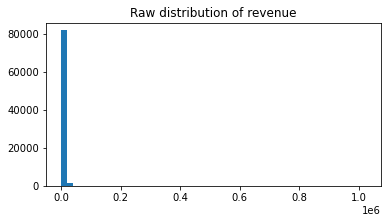

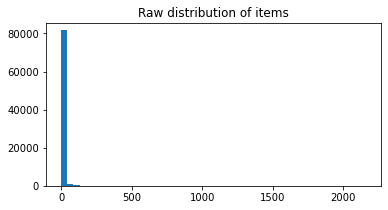

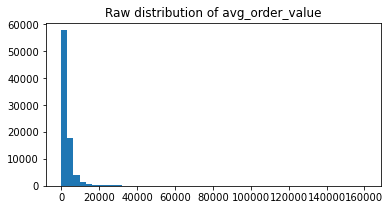

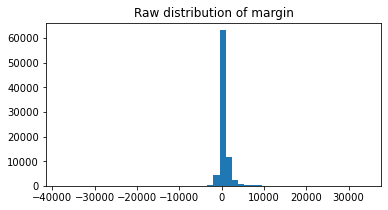

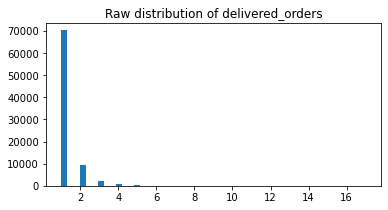

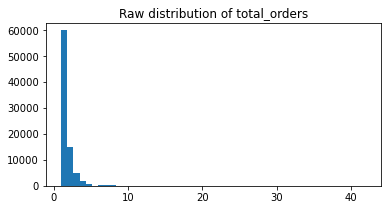

In [412]:
numeric_cols = [
    'revenue',
    'items',
    'avg_order_value',
    'margin',
    'delivered_orders',
    'total_orders'
]

import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    plt.hist(df[col].dropna(), bins=50)
    plt.title(f"Raw distribution of {col}")
    plt.show()

### Распределения числовых колонок (лог-масштаб)

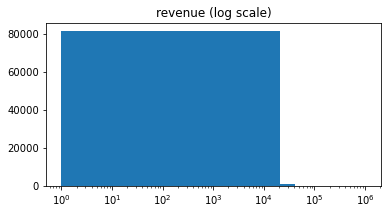

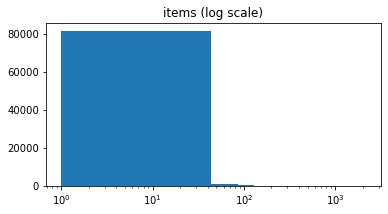

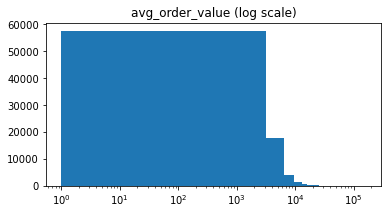

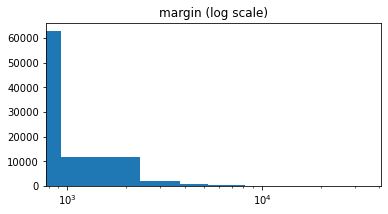

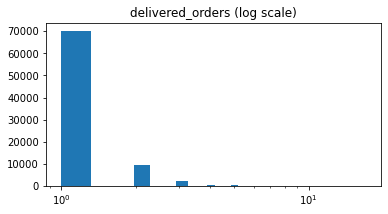

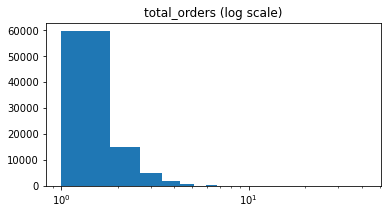

In [413]:
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    plt.hist(df[col].dropna(), bins=50)
    plt.xscale('log')
    plt.title(f"{col} (log scale)")
    plt.show()

### Winsorize + лог 

In [414]:
num_log_cols = [
    'revenue', 
    'items', 
    'avg_order_value', 
    'delivered_orders', 
    'total_orders'
]

# применяем log1p
for col in num_log_cols:
    df[col] = np.log1p(df[col])

# winsorize 1–99%
for col in num_log_cols:
    low, high = df[col].quantile(0.01), df[col].quantile(0.99)
    df[col] = np.clip(df[col], low, high)

# margin — отдельно (не логируем)
low, high = df['margin'].quantile(0.01), df['margin'].quantile(0.99)
df['margin'] = np.clip(df['margin'], low, high)

# avg_order_value — мягче
low, high = df['avg_order_value'].quantile(0.005), df['avg_order_value'].quantile(0.995)
df['avg_order_value'] = np.clip(df['avg_order_value'], low, high)

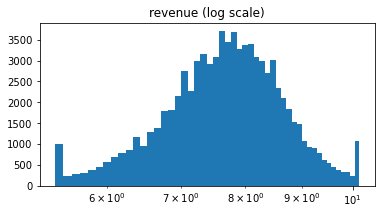

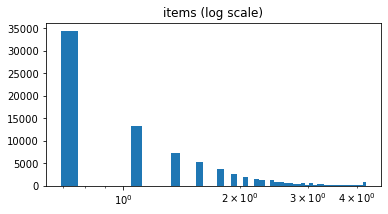

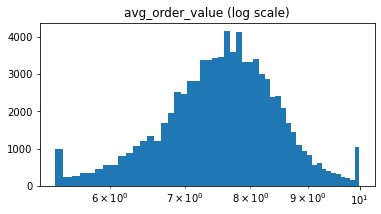

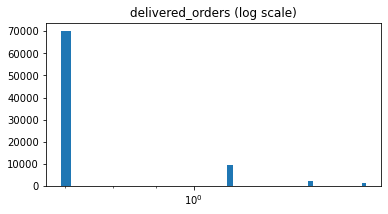

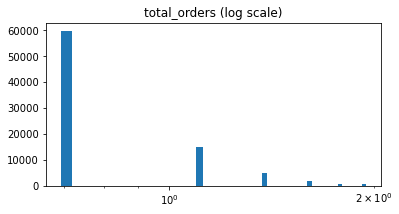

In [415]:
for col in num_log_cols:
    plt.figure(figsize=(6,3))
    plt.hist(df[col].dropna(), bins=50)
    plt.xscale('log')
    plt.title(f"{col} (log scale)")
    plt.show()

# Масштабирование и кодирование категорий

In [418]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

work = df.copy()

In [419]:
# 1) Определяем типы признаков
numeric_cols = work.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = work.select_dtypes(include=['object']).columns.tolist()
numeric_cols, categorical_cols

(['delivered_orders',
  'total_orders',
  'canceled_orders',
  'items',
  'revenue',
  'margin',
  'avg_order_value',
  'cancel_ratio',
  'total_returned_orders',
  'ДЕТСКОЕ ПИТАНИЕ',
  'ЖЕНСКИЕ ШТУЧКИ',
  'ИГРУШКИ',
  'КАНЦТОВАРЫ, КНИГИ, ДИСКИ',
  'КОСМЕТИКА/ГИГИЕНА',
  'КРУПНОГАБАРИТНЫЙ ТОВАР',
  'ОБУВЬ',
  'ПОДГУЗНИКИ',
  'СОПУТСТВУЮЩИЕ ТОВАРЫ',
  'ТЕКСТИЛЬ, ТРИКОТАЖ',
  'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА',
  'ТОВАРЫ ДЛЯ ЖИВОТНЫХ',
  'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ'],
 ['delivery_methods', 'payment_methods', 'cancel_reason_grouped'])

In [420]:
# 2) Выделим доли/0–1 признаки, которые не масштабируем
# (в твоём фрагменте это столбцы категориальных долей: 'ПОДГУЗНИКИ', 'КОСМЕТИКА/ГИГИЕНА', ...,
#  а также ratio-поля типа cancel_ratio, если они в [0,1])
prop_or_binary_cols = [
    c for c in numeric_cols
    if work[c].min() >= 0 and work[c].max() <= 1
]
prop_or_binary_cols

['cancel_ratio',
 'ДЕТСКОЕ ПИТАНИЕ',
 'ЖЕНСКИЕ ШТУЧКИ',
 'ИГРУШКИ',
 'КАНЦТОВАРЫ, КНИГИ, ДИСКИ',
 'КОСМЕТИКА/ГИГИЕНА',
 'КРУПНОГАБАРИТНЫЙ ТОВАР',
 'ОБУВЬ',
 'ПОДГУЗНИКИ',
 'СОПУТСТВУЮЩИЕ ТОВАРЫ',
 'ТЕКСТИЛЬ, ТРИКОТАЖ',
 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА',
 'ТОВАРЫ ДЛЯ ЖИВОТНЫХ',
 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ']

In [421]:
# Числа, которые будем масштабировать RobustScaler
num_scale_cols = sorted(list(set(numeric_cols) - set(prop_or_binary_cols)))
num_scale_cols

['avg_order_value',
 'canceled_orders',
 'delivered_orders',
 'items',
 'margin',
 'revenue',
 'total_orders',
 'total_returned_orders']

In [422]:
# 3) Строим ColumnTransformer
ct = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_scale_cols),  # масштабируем хвостатые числовые
        ('prop', 'passthrough', prop_or_binary_cols),  # доли/0–1 — как есть
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), categorical_cols)  # one-hot для категорий
    ],
    remainder='drop'
)

# 4) Применяем трансформации и получаем X
X = ct.fit_transform(work)

In [423]:
# 5) Получаем имена признаков после трансформаций
feature_names = []
feature_names += [f'RS__{c}' for c in num_scale_cols]
feature_names += prop_or_binary_cols

# имена для one-hot категорий
if categorical_cols:
    ohe = ct.named_transformers_['cat']
    try:
        ohe_feature_names = ohe.get_feature_names_out(categorical_cols).tolist()
    except:
        ohe_feature_names = ohe.get_feature_names(categorical_cols).tolist()
    feature_names += ohe_feature_names

In [424]:
# Проверки
print('X shape:', X.shape)
print('Scaled numeric cols:', len(num_scale_cols))
print('Prop/binary passthrough cols:', len(prop_or_binary_cols))
print('Categorical one-hot dims:', len(feature_names) - len(num_scale_cols) - len(prop_or_binary_cols))

# Пример первых строк как DataFrame (удобно для контроля)
X_df = pd.DataFrame(X, columns=feature_names)
X_df.head()

X shape: (83153, 38)
Scaled numeric cols: 8
Prop/binary passthrough cols: 14
Categorical one-hot dims: 16


,RS__avg_order_value,RS__canceled_orders,RS__delivered_orders,RS__items,RS__margin,RS__revenue,RS__total_orders,RS__total_returned_orders,cancel_ratio,ДЕТСКОЕ ПИТАНИЕ,ЖЕНСКИЕ ШТУЧКИ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,ОБУВЬ,ПОДГУЗНИКИ,СОПУТСТВУЮЩИЕ ТОВАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,delivery_methods_dpd,delivery_methods_pick point,delivery_methods_евросеть/связной,delivery_methods_курьерская,delivery_methods_магазины,delivery_methods_самовывоз,delivery_methods_сдэк,delivery_methods_транспортная компания,payment_methods_безналичная,payment_methods_наличная,cancel_reason_grouped_change_mind,cancel_reason_grouped_none,cancel_reason_grouped_other,cancel_reason_grouped_price_sensitive,cancel_reason_grouped_stock_issue,cancel_reason_grouped_timing_issue
0,2.082592,1.0,0.916291,2.840761,-2.475982,1.909719,3.089694,0.0,0.111111,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.082592,3.0,0.916291,2.840761,4.080784,1.909719,3.089694,0.0,0.428571,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.082592,0.0,0.693147,2.840761,8.019884,1.909719,1.709511,0.0,0.000000,0.019552,0.0,0.000000,0.000000,0.127407,0.131823,0.0,0.690217,0.0,0.023324,0.0,0.0,0.007676,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2.082592,1.0,0.693147,2.840761,-2.475982,1.909719,1.709511,0.0,0.333333,0.478842,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.521158,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2.082592,0.0,0.000000,2.840761,8.529735,1.909719,0.000000,0.0,0.000000,0.000000,0.0,0.959847,0.040153,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [374]:
features

,delivered_orders,total_orders,canceled_orders,items,revenue,margin,first_purchase,last_purchase,delivery_methods,payment_methods,avg_order_value,cancel_ratio,most_common_cancel_reason,total_returned_orders,ДЕТСКОЕ ПИТАНИЕ,ЖЕНСКИЕ ШТУЧКИ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,ОБУВЬ,ПОДГУЗНИКИ,СОПУТСТВУЮЩИЕ ТОВАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ
0,9,9,1,107,1023915.21,-4053.26,2018-01-24 18:26:00,2018-02-01 14:43:00,транспортная компания,безналичная,113768.356667,0.111111,4.01 Нет на остатках или нет в обработке ЗПЗ,0,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
1,7,7,3,68,789283.07,2817.96,2018-02-14 14:45:00,2018-02-26 18:09:00,транспортная компания,безналичная,112754.724286,0.428571,Авто корректировка склада,0,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
2,3,3,0,553,346252.00,5252.60,2018-01-15 12:46:00,2018-02-12 17:51:00,курьерская,наличная,115417.333333,0.000000,Нет,0,0.019552,0.0,0.000000,0.000000,0.127407,0.131823,0.0,0.690217,0.0,0.023324,0.0,0.0,0.007676
3,3,3,1,2159,203424.00,-37908.21,2018-02-20 12:41:00,2018-02-20 13:48:00,магазины,безналичная,67808.000000,0.333333,"1.4 Ошибка выбора, будет новый заказ",0,0.478842,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.521158,0.0,0.000000,0.0,0.0,0.000000
4,1,1,0,157,160635.00,26874.30,2018-01-16 18:43:00,2018-01-16 18:43:00,транспортная компания,безналичная,160635.000000,0.000000,Нет,0,0.000000,0.0,0.959847,0.040153,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83148,1,1,0,1,1.00,-419.00,2018-02-08 12:04:00,2018-02-08 12:04:00,курьерская,наличная,1.000000,0.000000,Нет,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.000000
83149,1,2,0,1,1.00,0.00,2018-01-10 16:26:00,2018-01-10 16:26:00,магазины,безналичная,1.000000,0.000000,Нет,0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
83150,1,1,0,1,1.00,-419.00,2018-02-08 13:19:00,2018-02-08 13:19:00,курьерская,наличная,1.000000,0.000000,Нет,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.000000
83151,1,1,0,1,1.00,-419.00,2018-02-08 12:36:00,2018-02-08 12:36:00,курьерская,наличная,1.000000,0.000000,Нет,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.000000


In [371]:
# --- СИГНАЛ ОКОНЧАНИЯ ---
import numpy as np, platform, os, shutil
from IPython.display import Audio, display

# 1) Чистый Python через аудиомасив (работает везде, без внешних утилит)
sr = 44_100
t = np.linspace(0, 0.4, int(sr*0.4), endpoint=False)
beep = np.sin(2*np.pi*880*t) * 0.2
display(Audio(beep, rate=sr, autoplay=True))

# 2) Плюс системный бип/голос (опционально, на случай если браузер звук заблокирует)
try:
    if platform.system() == "Darwin":
        os.system('say "Урааааааа!" || afplay /System/Library/Sounds/Glass.aiff')
    elif platform.system() == "Windows":
        import winsound; winsound.MessageBeep()
    else:
        if shutil.which('paplay'):
            os.system('paplay /usr/share/sounds/freedesktop/stereo/complete.oga')
        elif shutil.which('play'):
            os.system('play -nq -t alsa synth 0.3 sin 880')
        else:
            print('\a')  # терминальный «bell»
except Exception:
    print('\a')